# `Project`

The `Project` class lets us handle groups of wells. It is really just a list of `Well` objects.

In [5]:
import welly

welly.__version__

'0.4.10.dev35+g5a439b6.d20220207'

---

## Make a project

In [2]:
from welly import Project

In [3]:
!ls data/*.LAS

data/24034.LAS	    data/P-130_out.LAS	data/P-135_time.LAS
data/P-129_out.LAS  data/P-135_out.LAS


You can pass in a list of files:

In [4]:
p = Project.from_las(['data/P-129_out.LAS', 'data/P-130_out.LAS'])

0it [00:00, ?it/s]Only engine='normal' can read wrapped files
2it [00:02,  1.03s/it]


Or a POSIX-style path:

In [5]:
p = Project.from_las("data/P-*_out.LAS")

1it [00:00,  2.08it/s]Only engine='normal' can read wrapped files
2it [00:02,  1.09s/it]Only engine='normal' can read wrapped files
3it [00:02,  1.09it/s]


In [6]:
len(p)

3

Typical, the UWIs are a disaster. Let's ignore this for now.

The `Project` is really just a list-like thing:

In [6]:
for w in p:
    print(w.uwi)

Long = 63* 45'24.460  W
100/N14A/11E05


Some of the UWIs are pretty messed up.

## Plot curves from several wells

In [7]:
import matplotlib.pyplot as plt

In [8]:
alias = {'Gamma': ['GR', 'GRC', 'NGT'], 'Caliper': ['HCAL', 'CALI']}

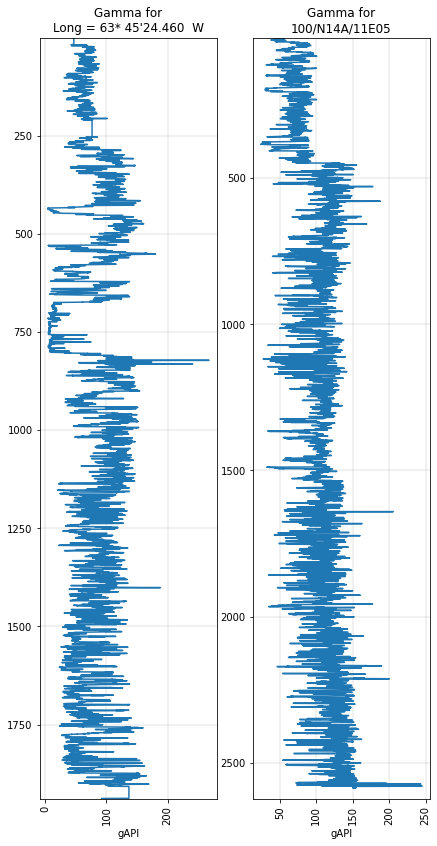

In [9]:
fig, axs = plt.subplots(figsize=(7, 14), ncols=len(p))

for i, (ax, w) in enumerate(zip(axs, p)):
    gr = w.get_curve('Gamma', alias=alias)
    if gr is not None:
        ax = gr.plot(ax=ax)
    ax.set_title("Gamma for\n{}".format(w.uwi))
    
plt.show()

## Export data to pandas DataFrame

This makes a DataFrame using a dual index of UWI and Depth.

In [10]:
keys = ['Caliper', 'Gamma', 'DT']

df = p.df(keys=keys, alias=alias)
df

Caliper        Gamma  DT
UWI                     DEPT                                    
Long = 63* 45'24.460  W 1.0668     4.3912849426  46.69865036 NaN
                        1.2192     4.3912849426  46.69865036 NaN
                        1.3716     4.3912849426  46.69865036 NaN
                        1.5240     4.3912849426  46.69865036 NaN
                        1.6764     4.3912849426  46.69865036 NaN
...                                         ...          ...  ..
100/N14A/11E05          2622.9000           NaN          NaN NaN
                        2623.0000           NaN          NaN NaN
                        2623.1000           NaN          NaN NaN
                        2623.2000           NaN          NaN NaN
                        2623.3000           NaN          NaN NaN

[38751 rows x 3 columns]

In [11]:
df.describe()

,Caliper,Gamma,DT
count,27743.0000000000,38335.0000000000,36379.0000000000
mean,8.5499053697,95.5289462810,71.3771381000
std,1.4973315519,32.6976216554,11.2859918722
min,3.0099213123,3.8940699100,40.5831336980
25%,8.4137792588,72.7839241030,64.7815818785
50%,8.7372837067,101.9860000600,68.9576492310
75%,9.0309648514,119.8470001200,75.4713745115
max,15.5796451570,267.9404296900,134.0126342800


<AxesSubplot:xlabel='DEPT'>

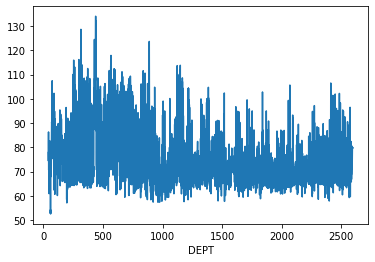

In [12]:
df.loc['100/N14A/11E05'].DT.plot()

In [13]:
x = df.loc['100/N14A/11E05'].index
idx = df.loc['100/N14A/11E05'].loc[(28<x) & (x<30)].index
idx

Float64Index([28.1, 28.2, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9, 29.0, 29.1,
              29.2, 29.3, 29.4, 29.5, 29.6, 29.7, 29.8, 29.9],
             dtype='float64', name='DEPT')

## Quality

We can make some tests of curve quality.

In [14]:
import welly.quality as q

In [15]:
tests = {
#    'Each': [q.no_gaps],
    'Gamma': [q.no_monotonic, q.no_flat, q.all_positive],
    'DT': [q.all_positive, q.all_between(50, 200)],
}

In [16]:
from IPython.display import HTML

In [17]:
HTML(p.curve_table_html(keys=['CALI', 'Gamma', 'DT', 'SP'], tests=tests, alias=alias))

---

&copy; 2022 Agile Scientific, CC BY